## Ordinary python lists

In [ ]:
[3,4,5,"Bob"]

In [ ]:
mylist = [2,5,7,"Alice"]
mylist

In [ ]:
mylist[3]

In [ ]:
mylist[4]

### Building lists

With a `for` loop:

In [ ]:
evennumbers = []
for i in range(200):
    if i%2 == 0:
        evennumbers.append(i)
len(evennumbers)

With a `while` loop

In [ ]:
evennumbers = [0]
while len(evennumbers) < 100:
    evennumbers.append(evennumbers[-1]+2)
len(evennumbers)

Another `for` loop

In [ ]:
evennumbers = []
for i in range(100):
    evennumbers.append(2*i)

    
# We can slice lists
evennumbers[3:7]

With a *list comprehension*:

In [ ]:
evennumbers = [2*i for i in range(100)]
evennumbers[-4:-1]

With a different list comprehension:

In [ ]:
evennumbers = [i for i in range(200) if i%2 == 0]
evennumbers[50:-48]

In [ ]:
sum(evennumbers) 

### Nested clauses

In [ ]:
v = 0
for e in evennumbers:
    #print("This will happen every time")
    if e > 50:
        #print("This will happen fifty times")
        if e%7 == 0:
            #print("This will happen only for even multiples of 7 bigger than 50")
            v += 1
v

## About numpy

In [1]:
import numpy as np

A `numpy` `array` is just a dressed-up list:

In [ ]:
evennumbers = np.arange(0,200,2)
evennumbers

With some extra functionality:

In [ ]:
evennumbers.mean()

In [ ]:
evennumbers[evennumbers < 10]

### and pandas

In [2]:
import pandas as pd

`pandas` just dresses `numpy` in some more functionality:

In [ ]:
a = np.array([1,2,3])
b = np.array(["bob","gene","tina"])
df = pd.DataFrame(data = {
    'number': a,
    'name': b
})
df

## Back to numpy

Let's generate a normally distributed population:

In [ ]:
population = np.random.normal(loc=50, scale=3, size=10000)

`loc` is $\mu$, `scale` is $\sigma$, `size` is $N$

Let's take a sample from this population:

In [ ]:
sample = np.random.choice(population, size=100, replace=False)

print("Population mean = {}".format(population.mean().round(2)))
print("Sample mean = {}".format(sample.mean().round(2)))

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
fig, axs = plt.subplots()
sns.distplot(population, ax = axs)
axs.axvline(population.mean())
sns.distplot(sample, ax = axs)
axs.axvline(sample.mean())

In [ ]:
from ipywidgets import interact

In [ ]:
def update(n):
    print(n)

interact(update,n=(1,100))

The continuous updating is annoying so...

In [ ]:
from ipywidgets import IntSlider

In [ ]:
def update(n):
    print(n)

interact(update,n=IntSlider(min=1, max=100, step=1, continuous_update=False))

In [ ]:

def update(n):
    fig, axs = plt.subplots()
    sns.distplot(population, ax = axs)
    axs.set_ylim(0,0.2)
    axs.set_xlim(30,70)
    axs.axvline(population.mean())
    sample = np.random.choice(population, size=n, replace=False)
    sns.distplot(sample, ax = axs)
    axs.axvline(sample.mean())

interact(update,n=IntSlider(value=10, min=2, max=1000, step=1, continuous_update=False))

So the sample mean $\bar{x}$ is a good (unbiased) estimator for the population mean $\mu$.

The same is **not** true of the standard deviation.

In [ ]:

def update(n):
    # make a set of axes
    fig, axs = plt.subplots()
    # set the axes
    axs.set_ylim(0,0.2)
    axs.set_xlim(30,70)
    # plot the population
    sns.distplot(population, ax = axs)
    # find the mean and sd for the population
    mu = population.mean()
    sigma = population.std()
    # color one sd from the mean
    axs.axvspan(mu-sigma, mu+sigma, facecolor="lightsteelblue", alpha=0.4)
    # draw a sample
    sample = np.random.choice(population, size=n, replace=False)
    # plot the sample
    sns.distplot(sample, ax = axs)
    # find the sample mean and the 'wrong' sd
    xbar = sample.mean()
    s = sample.std()
    axs.axvspan(xbar-s,xbar+s, facecolor="wheat", alpha=0.2)
    print("Standard deviation of sample with /n = {}".format(s))
    print("Population standard deviation = {}".format(sigma))


interact(update,n=IntSlider(value=10, min=2, max=1000, step=1, continuous_update=False))

**This is not quite as compelling a visualisation as we wanted.**

We want to show that using $\dfrac{\sum(x-\bar{x})^2}{n}$ tends to *underestimate* the standard deviation of the population, which is why we use $n-1$ instead.

But of course, at these sample sizes, the difference between dividing by $n$ and dividing by $n-1$ is not going to be visible on a graph.

Instead, we could draw a lot of samples and plot the distribution of the uncorrected and corrected standard deviations compared to the true value.

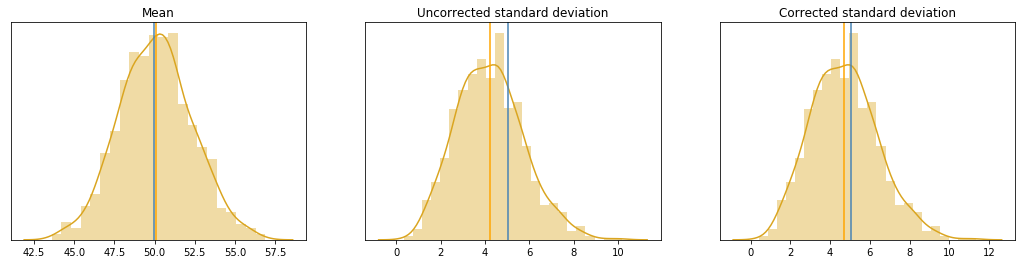

In [5]:
# Our population
population = np.random.normal(loc=50, scale=5, size=10000)
# Make 1000 samples, each of size 5
samples = [np.random.choice(population, size=5, replace=False) for _ in range(1000)]
# Make an array of the means of each sample
sample_means = np.array([sample.mean() for sample in samples])
# And their (uncorrected) standard deviations
sample_stds =np.array([sample.std() for sample in samples])
# Amd their (corrected) standar deviations
sample_stds_corrected = np.array([sample.std(ddof=1) for sample in samples])
# We want three sets of axes
fig, axs = plt.subplots(1,3)
fig.set_figwidth(18)
# plot the distribution of means around the true mean
axs[0].set_title("Mean")
axs[0].get_yaxis().set_visible(False)
sns.distplot(sample_means, ax=axs[0], color="goldenrod")
axs[0].axvline(population.mean(), color="steelblue")
axs[0].axvline(sample_means.mean(), color="orange")
# and the distribution of uncorrected standard deviations around the true standard deviation
axs[1].set_title("Uncorrected standard deviation")
axs[1].get_yaxis().set_visible(False)
sns.distplot(sample_stds, ax=axs[1], color="goldenrod")
axs[1].axvline(population.std(), color="steelblue")
axs[1].axvline(sample_stds.mean(), color="orange")
# and the distribution of corrected standard deviations around the true standard deviation
axs[2].set_title("Corrected standard deviation")
axs[2].get_yaxis().set_visible(False)
sns.distplot(sample_stds_corrected, ax=axs[2], color="goldenrod")
axs[2].axvline(population.std(), color="steelblue")
axs[2].axvline(sample_stds_corrected.mean(), color="orange")